In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [3]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,45.510941,1132.989990
2010-01-05,45.525822,1136.520020
2010-01-06,45.309883,1137.140015
2010-01-07,45.064171,1141.689941
2010-01-08,45.004593,1144.979980


In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2019-01-30,94.519997,2681.050049
2019-01-31,96.470001,2704.100098
2019-02-01,97.470001,2706.530029
2019-02-04,98.029999,2724.870117
2019-02-05,97.440002,2737.699951


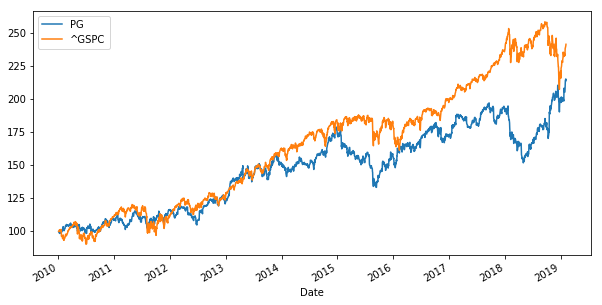

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

PG       0.083219
^GSPC    0.096443
dtype: float64

In [8]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.021372,0.011677
^GSPC,0.011677,0.022485


In [9]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.532687
^GSPC,0.532687,1.000000


In [10]:
num_assets = len(assets)

In [11]:
num_assets

2

In [12]:
arr = np.random.random(2)
arr

array([0.30518636, 0.89193626])

In [13]:
arr[0] + arr[1]

1.1971226191066817

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.97817628, 0.02182372])

In [15]:
weights[0] + weights[1]

1.0

Expected Portfolio Return:

In [16]:
np.sum(weights * log_returns.mean()) * 250

0.08350723450621304

Expected Portfolio Variance:

In [17]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.020958782159554983

Expected Portfolio Volatility:

In [18]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.14477148254941297

***

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.08938856106073383,
  0.09366384341179664,
  0.09562118911173513,
  0.08724631379077616,
  0.08519380473639697,
  0.0903741931155787,
  0.08917214553442118,
  0.09508465578904743,
  0.09133702353792929,
  0.09507051263516131,
  0.08591801088301483,
  0.08735661997703824,
  0.09183107696883727,
  0.08988277856554461,
  0.0920828837184407,
  0.0952824772921249,
  0.08914027003527514,
  0.09569018262932719,
  0.08799549287500458,
  0.08470690165094877,
  0.08947090909102222,
  0.09409248337184753,
  0.09071367978072054,
  0.08598472494137258,
  0.0899122843836496,
  0.09421126560668809,
  0.0909733258641162,
  0.08364130800985321,
  0.0950102340398809,
  0.08654219397731504,
  0.09145822493698622,
  0.09286034166347998,
  0.08928028130413397,
  0.09295905053325562,
  0.08367579281570442,
  0.09421993161025798,
  0.08883812987564012,
  0.09406912239138926,
  0.0901635363923228,
  0.08946046832689226,
  0.09047294174395674,
  0.09051907532093198,
  0.08539247090560571,
  0.09452391028941

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.09220262, 0.09212011, 0.0833891 , 0.09146014, 0.08362835,
        0.09104904, 0.08912761, 0.08968907, 0.08977315, 0.09407111,
        0.09356892, 0.08661477, 0.08690272, 0.09145609, 0.0919331 ,
        0.09032772, 0.08584354, 0.09301823, 0.08543581, 0.09004778,
        0.08448732, 0.08731732, 0.09069688, 0.0897708 , 0.08540812,
        0.09287166, 0.08387408, 0.08997611, 0.08400897, 0.09013119,
        0.08884458, 0.08938605, 0.0905713 , 0.09065783, 0.08495889,
        0.08487269, 0.09078887, 0.0854984 , 0.08820063, 0.08985122,
        0.09380346, 0.08804163, 0.08344259, 0.09125803, 0.08364999,
        0.09453607, 0.08630419, 0.08989102, 0.0911695 , 0.08851353,
        0.09266837, 0.08504224, 0.09220408, 0.09372967, 0.08480877,
        0.08975173, 0.09473155, 0.09111036, 0.08968658, 0.0883335 ,
        0.08397017, 0.08568093, 0.08810673, 0.09186483, 0.0888743 ,
        0.08983007, 0.0908197 , 0.09389595, 0.0888506 , 0.09596379,
        0.08895635, 0.08515237, 0.09437464, 0.09

In [21]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [22]:
portfolios.head()

,Return,Volatility
0,0.092203,0.132899
1,0.092120,0.132703
2,0.083389,0.145347
3,0.091460,0.131344
4,0.083628,0.144191


In [23]:
portfolios.tail()

,Return,Volatility
995,0.084510,0.140263
996,0.092904,0.134791
997,0.090293,0.129872
998,0.093707,0.137443
999,0.083807,0.143354


Text(0, 0.5, 'Expected Return')

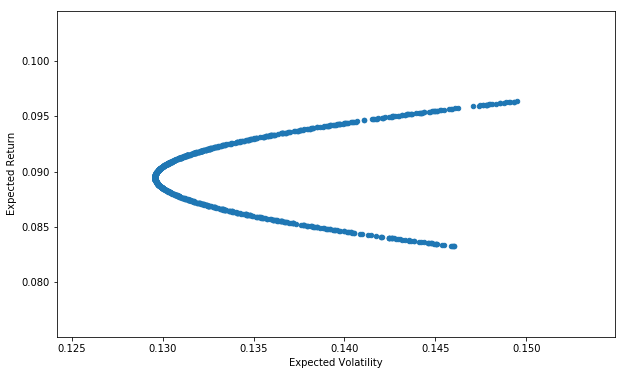

In [24]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')